## Credit_Scoring_Model

In [65]:
# CREDIT RISK PREDICTION PROJECT

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    roc_curve
)
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Load dataset
data = pd.read_csv("credit_data.csv")

# Display first few rows
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [37]:
print("Dataset Shape:", data.shape)
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Types:\n", data.dtypes)

Dataset Shape: (1000, 11)

Missing Values:
 Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Data Types:
 Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object


In [39]:
# Fill missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

In [41]:
label_encoder = LabelEncoder()

for col in data.select_dtypes(include='object').columns:
    data[col] = label_encoder.fit_transform(data[col])

In [43]:
X = data.drop("Risk", axis=1)
y = data["Risk"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [47]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_prob = lr.predict_proba(X_test_scaled)[:,1]

In [51]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)[:,1]

In [53]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:,1]

In [55]:
def evaluate_model(name, y_test, y_pred, y_prob):
    print(f"\n{name} Performance")
    print("-"*40)
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))
    print("ROC-AUC  :", roc_auc_score(y_test, y_prob))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [57]:
evaluate_model("Logistic Regression", y_test, lr_pred, lr_prob)
evaluate_model("Decision Tree", y_test, dt_pred, dt_prob)
evaluate_model("Random Forest", y_test, rf_pred, rf_prob)


Logistic Regression Performance
----------------------------------------
Accuracy : 0.688
Precision: 0.7081545064377682
Recall   : 0.9428571428571428
F1 Score : 0.8088235294117647
ROC-AUC  : 0.6634666666666668

Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.09      0.15        75
           1       0.71      0.94      0.81       175

    accuracy                           0.69       250
   macro avg       0.56      0.52      0.48       250
weighted avg       0.62      0.69      0.61       250


Decision Tree Performance
----------------------------------------
Accuracy : 0.704
Precision: 0.7393364928909952
Recall   : 0.8914285714285715
F1 Score : 0.8082901554404145
ROC-AUC  : 0.6059809523809523

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.27      0.35        75
           1       0.74      0.89      0.81       175

    accuracy                           0.70

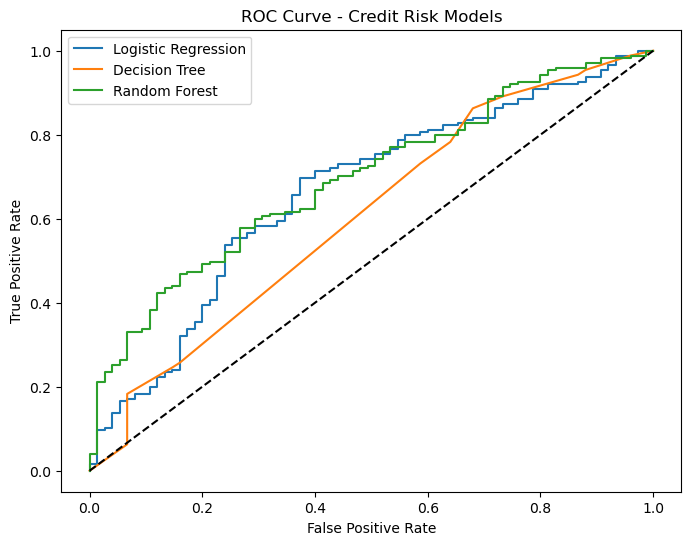

In [59]:
plt.figure(figsize=(8,6))

for model_name, y_prob in zip(
    ["Logistic Regression", "Decision Tree", "Random Forest"],
    [lr_prob, dt_prob, rf_prob]
):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=model_name)

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Credit Risk Models")
plt.legend()
plt.show()

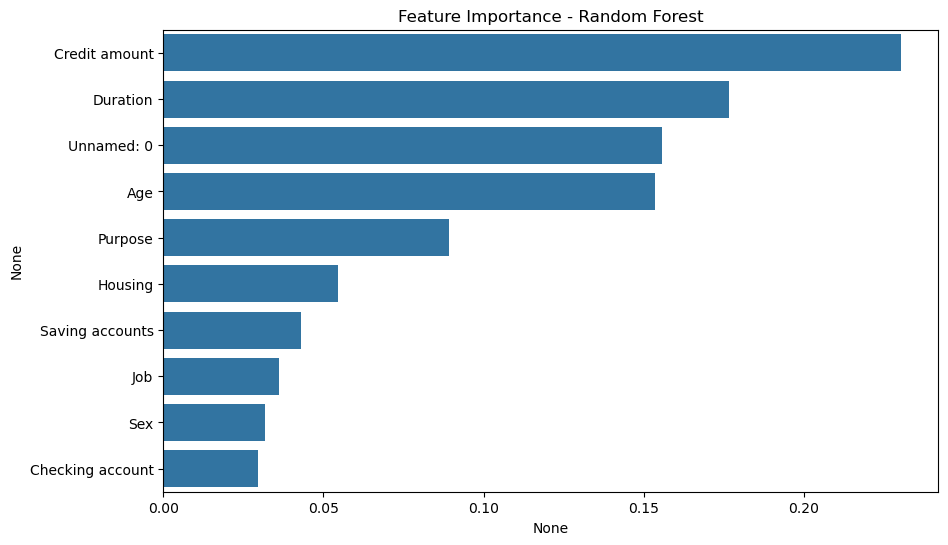

In [61]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance - Random Forest")
plt.show()